In [1]:
import glob
import datetime
import numpy
import pandas

In [2]:
df1 = pandas.read_csv("scientific-2014-2019.csv", parse_dates=[0], infer_datetime_format=True)
df2 = pandas.read_csv("scientific-2019-Apr30.csv", parse_dates=[0], infer_datetime_format=True)
df = pandas.concat([df1, df2])
df.columns, len(df)

/home/pivarski/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/pivarski/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(Index(['timestamp', 'file_project', 'file_version', 'country_code',
        'details_distro_name'],
       dtype='object'), 7382205)

In [20]:
list(df[["file_project", "file_version"]].groupby("file_project").count().sort_values("file_version", ascending=False).index)[:1000]

['pip',
 'wheel',
 'setuptools',
 'psutil',
 'requests',
 'idna',
 'urllib3',
 'pymysql',
 'certifi',
 'argparse',
 'xlsxwriter',
 'chardet',
 'subprocess32',
 'numpy',
 'six',
 'h5py',
 'websocket-client',
 'scipy',
 'python-dateutil',
 'requests-oauthlib',
 'google-auth',
 'pytz',
 'kubernetes',
 'scikit-learn',
 'click',
 'pyparsing',
 'sklearn',
 'pyasn1',
 'pyyaml',
 'adal',
 'enum34',
 'simplejson',
 'docutils',
 'cryptography',
 'matplotlib',
 'colorama',
 'cffi',
 'ordereddict',
 'futures',
 'pbr',
 'funcsigs',
 'pycparser',
 'ipaddress',
 'botocore',
 'pandas',
 'mock',
 'jmespath',
 'cycler',
 'markupsafe',
 'awscli',
 'jinja2',
 'rsa',
 'importlib',
 's3transfer',
 'decorator',
 'pyopenssl',
 'packaging',
 'asn1crypto',
 'pytest',
 'virtualenv',
 'py',
 'pymongo',
 'appdirs',
 'pygments',
 'pluggy',
 'markdown',
 'pexpect',
 'ptyprocess',
 'cliff',
 'protobuf',
 'statsd-client',
 'jsonschema',
 'linecache2',
 'functools32',
 'unittest2',
 'traceback2',
 'gitpython',
 'parami

In [21]:
df["days"] = numpy.round((df["timestamp"] - datetime.datetime(2016, 1, 1)).dt.days).astype(numpy.int16)

In [93]:
df["scientific"] = (df["file_project"] == "numpy") | (df["file_project"] == "h5py") | (df["file_project"] == "scipy") | (df["file_project"] == "scikit-learn") | (df["file_project"] == "sklearn") | (df["file_project"] == "matplotlib") | (df["file_project"] == "pandas") | (df["file_project"] == "cycler") | (df["file_project"] == "root-pandas") | (df["file_project"] == "tensorflow") | (df["file_project"] == "uproot") | (df["file_project"] == "awkward") | (df["file_project"] == "astropy") | (df["file_project"] == "seaborn") | (df["file_project"] == "biopython") | (df["file_project"] == "theano") | (df["file_project"] == "root-numpy") | (df["file_project"] == "rootpy") | (df["file_project"] == "numexpr") | (df["file_project"] == "dask") | (df["file_project"] == "numba") | (df["file_project"] == "sympy") | (df["file_project"] == "pycuda") | (df["file_project"] == "mpi4py") | (df["file_project"] == "torch") | (df["file_project"] == "uncertainties") | (df["file_project"] == "plotly") | (df["file_project"] == "xarray") | (df["file_project"] == "xgboost") | (df["file_project"] == "bokeh") | (df["file_project"] == "torchvision") | (df["file_project"] == "alphatwirl") | (df["file_project"] == "rpy2") | (df["file_project"] == "jupyterlab") | (df["file_project"] == "iminuit") | (df["file_project"] == "statistics") | (df["file_project"] == "pytorch") | (df["file_project"] == "cupy") | (df["file_project"] == "skimage") | (df["file_project"] == "xrootd") | (df["file_project"] == "pymc")

In [97]:
df["non-scientific"] = numpy.logical_not(df["scientific"])

In [176]:
ticks = numpy.cumsum([0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                         31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                         31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
                         31, 28, 31, 30])
labels = ["2016", "", "Mar", "", "May", "", "Jul", "", "Sep", "", "Nov", "",
          "2017", "", "Mar", "", "May", "", "Jul", "", "Sep", "", "Nov", "",
          "2018", "", "Mar", "", "May", "", "Jul", "", "Sep", "", "Nov", "",
          "2019", "", "Mar", "", "May"]

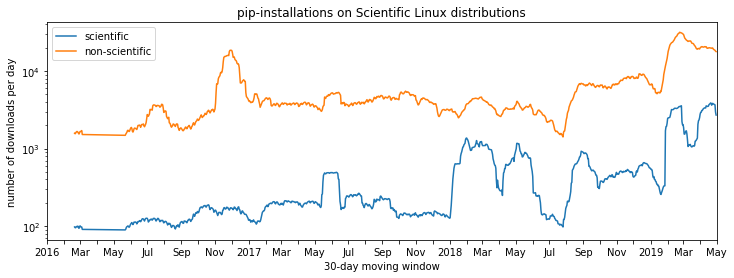

In [192]:
plt = df[["days", "scientific", "non-scientific"]].groupby("days").sum().rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-scinonsci.pdf")
plt.get_figure().savefig("pip-scientificlinux-scinonsci.png")

In [22]:
df2 = df[["days", "file_project"]]

In [27]:
df2["numpy"] = df2["file_project"] == "numpy"
df2["h5py"] = df2["file_project"] == "h5py"
df2["scipy"] = df2["file_project"] == "scipy"
df2["scikit-learn"] = df2["file_project"] == "scikit-learn"
df2["sklearn"] = df2["file_project"] == "sklearn"
df2["matplotlib"] = df2["file_project"] == "matplotlib"
df2["pandas"] = df2["file_project"] == "pandas"
df2["cycler"] = df2["file_project"] == "cycler"
df2["root-pandas"] = df2["file_project"] == "root-pandas"
df2["tensorflow"] = df2["file_project"] == "tensorflow"
df2["uproot"] = df2["file_project"] == "uproot"
df2["awkward"] = df2["file_project"] == "awkward"
df2["astropy"] = df2["file_project"] == "astropy"
df2["seaborn"] = df2["file_project"] == "seaborn"
df2["biopython"] = df2["file_project"] == "biopython"
df2["theano"] = df2["file_project"] == "theano"
df2["root-numpy"] = df2["file_project"] == "root-numpy"
df2["rootpy"] = df2["file_project"] == "rootpy"
df2["numexpr"] = df2["file_project"] == "numexpr"
df2["dask"] = df2["file_project"] == "dask"
df2["numba"] = df2["file_project"] == "numba"
df2["sympy"] = df2["file_project"] == "sympy"
df2["pycuda"] = df2["file_project"] == "pycuda"
df2["mpi4py"] = df2["file_project"] == "mpi4py"
df2["torch"] = df2["file_project"] == "torch"
df2["uncertainties"] = df2["file_project"] == "uncertainties"
df2["plotly"] = df2["file_project"] == "plotly"
df2["xarray"] = df2["file_project"] == "xarray"
df2["xgboost"] = df2["file_project"] == "xgboost"
df2["bokeh"] = df2["file_project"] == "bokeh"
df2["torchvision"] = df2["file_project"] == "torchvision"
df2["alphatwirl"] = df2["file_project"] == "alphatwirl"
df2["rpy2"] = df2["file_project"] == "rpy2"
df2["jupyterlab"] = df2["file_project"] == "jupyterlab"
df2["iminuit"] = df2["file_project"] == "iminuit"
df2["statistics"] = df2["file_project"] == "statistics"
df2["pytorch"] = df2["file_project"] == "pytorch"
df2["cupy"] = df2["file_project"] == "cupy"
df2["skimage"] = df2["file_project"] == "skimage"
df2["xrootd"] = df2["file_project"] == "xrootd"
df2["pymc"] = df2["file_project"] == "pymc"

/home/pivarski/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pivarski/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pivarski/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [29]:
df3 = df2.groupby("days").sum()

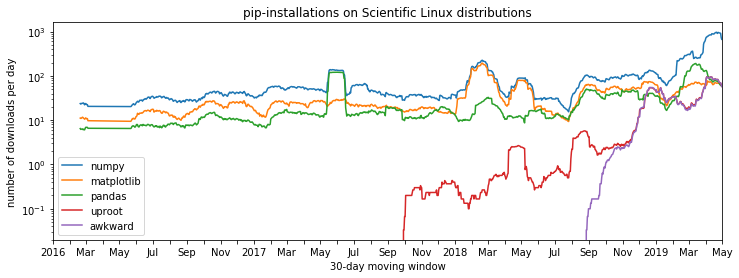

In [193]:
plt = df3[["numpy", "matplotlib", "pandas", "uproot", "awkward"]].rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-uproot.pdf")
plt.get_figure().savefig("pip-scientificlinux-uproot.png")

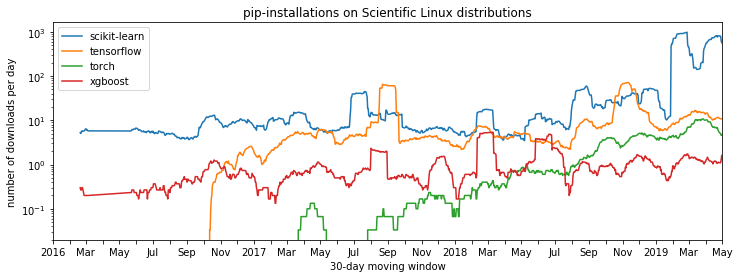

In [194]:
plt = df3[["scikit-learn", "tensorflow", "torch", "xgboost"]].rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-ml.pdf")
plt.get_figure().savefig("pip-scientificlinux-ml.png")

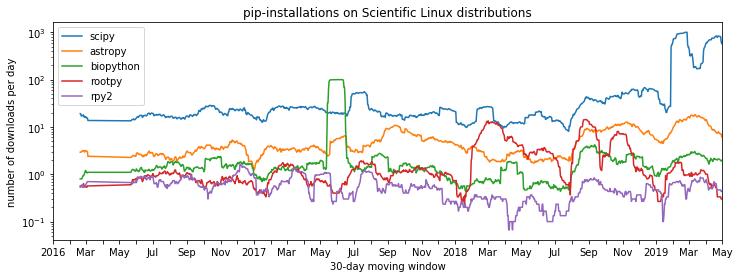

In [195]:
plt = df3[["scipy", "astropy", "biopython", "rootpy", "rpy2"]].rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-other.pdf")
plt.get_figure().savefig("pip-scientificlinux-other.png")

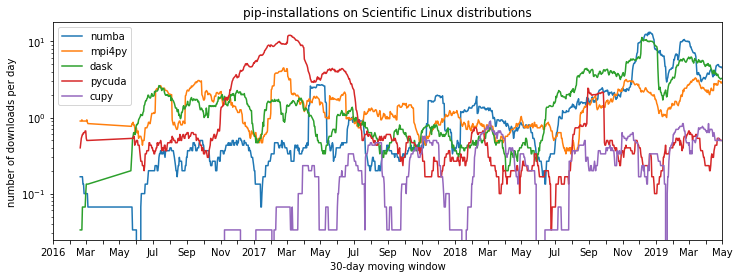

In [196]:
plt = df3[["numba", "mpi4py", "dask", "pycuda", "cupy"]].rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-scaling.pdf")
plt.get_figure().savefig("pip-scientificlinux-scaling.png")

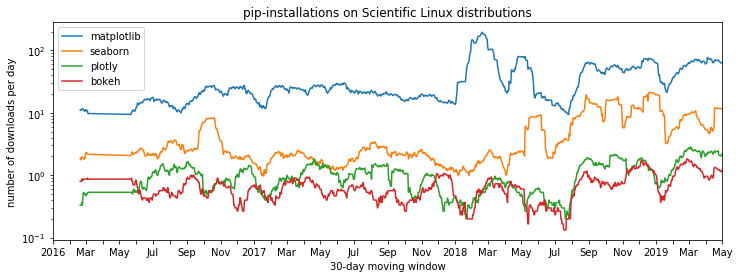

In [197]:
plt = df3[["matplotlib", "seaborn", "plotly", "bokeh"]].rolling(30).mean().plot(logy=True, figsize=(12, 4))
plt.set_xticks(ticks)
plt.set_xticklabels(labels)
plt.set_xlim(0, ticks[-1])
plt.set_title("pip-installations on Scientific Linux distributions")
plt.set_ylabel("number of downloads per day")
plt.set_xlabel("30-day moving window")
plt.get_figure().savefig("pip-scientificlinux-plotting.pdf")
plt.get_figure().savefig("pip-scientificlinux-plotting.png")